# Assignment 1 -- Random Walk for Graph Connectivity Testing
#### Jessica Leishman 100747155

## Implementation
### Import Statements

In [95]:
import networkx as nx
import random
import matplotlib.pyplot as plt

### Generate Graph

In [96]:
def generate_graph(directionGraph, number_of_nodes):
    Graph = nx.gnp_random_graph(number_of_nodes, 0.5, directed=directionGraph)
    return Graph

### Random Walk Algorithm

In [97]:
def random_walk(Graph, steps, walks):
    
    random_walks = []

    # iterate through required number of walks to complete
    for i in range(walks):
        # Randomly select a starting node
        start_node = random.choice(list(Graph.nodes()))

        # Perform a single random walk
        random_walk = [start_node]
        
        #loop to iterate the required number of walk lengths
        for j in range(steps - 1):
            # get the neighboring nodes of the current node (accounts for directed and undirected graphs through .neighbours)
            neighbors = list(Graph.neighbors(random_walk[-1]))
            
            if neighbors:
                random_walk.append(random.choice(neighbors))
            else: #if node is a dead end, need to end the walk.  Any bidirectional walks would be listed if available
                break

        random_walks.append(random_walk)

    return random_walks



### Draw Walk Function

In [98]:
#full disclosure i got most of this from stack overflow because i thought my list of nodes was good enough but this was fast
#link here: https://stackoverflow.com/questions/29838746/how-to-draw-subgraph-using-networkx
def draw_walk(Graph, walk):
    # directed graph for the subgraph so arrows show
    subgraph = nx.DiGraph()

    # Add nodes and directed edges from the walk
    subgraph.add_nodes_from(walk)
    subgraph.add_edges_from([(walk[i], walk[i+1]) for i in range(len(walk)-1)])

    node_colors = ['g' if node == walk[0] else 'r' if node == walk[-1] else 'orange' for node in subgraph.nodes()]

    # Draw the subgraph with directional edges
    pos = nx.spring_layout(Graph)
    nx.draw(subgraph, pos, with_labels=True, node_color=node_colors, font_color='w', font_weight='bold')
    nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges(), width=2, arrows=True)
    plt.title("step")
    plt.show()

### Execution of Algorithm

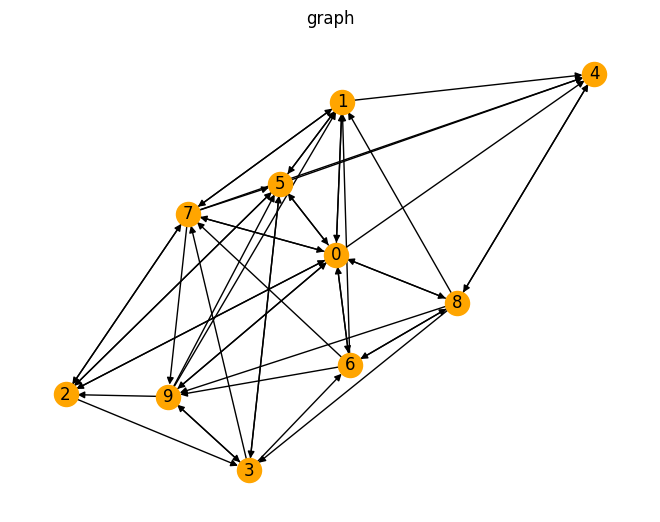

[5, 3, 6]


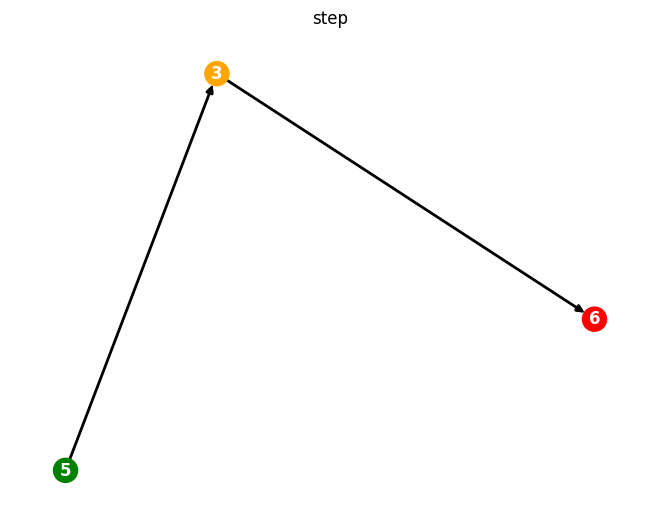

[8, 0, 1]


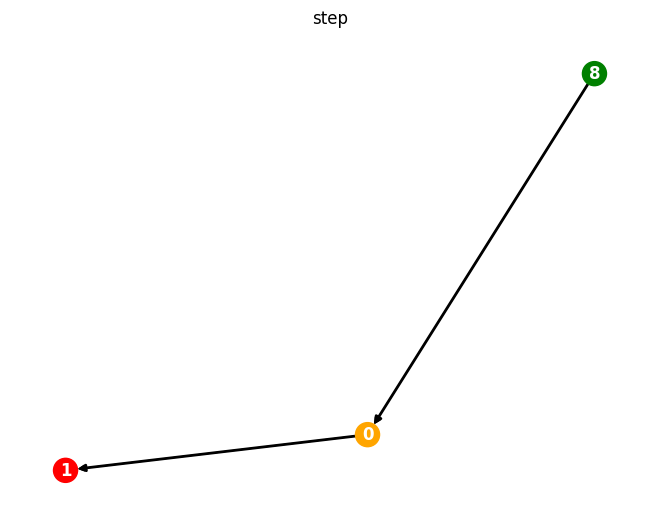

[4, 8, 6]


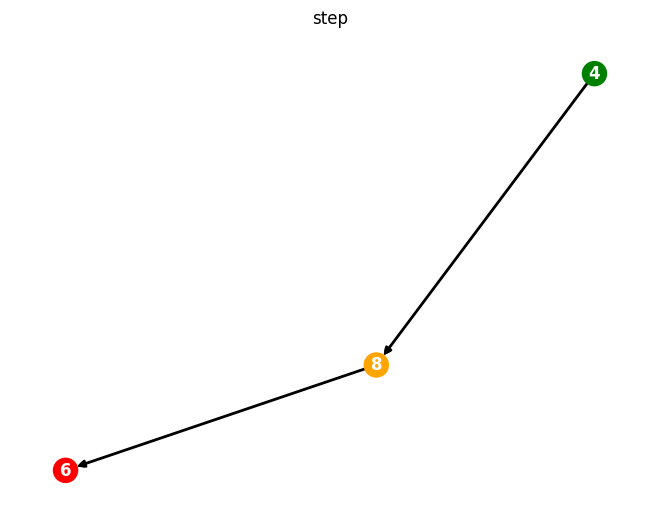

In [99]:
#Graph initialization variables
graph_is_directed = True
number_of_nodes = 10

#random walk variables
number_of_walks = 3
walk_length = 3

walk_graph = generate_graph(graph_is_directed, number_of_nodes)
nx.draw(walk_graph, with_labels=True,node_color='orange')
plt.title("graph")
plt.show()

walks = random_walk(walk_graph,walk_length,number_of_walks)

for walk in walks:
    print(walk)

    #i found a stackoverflow article on how i can display each walk too
    draw_walk(walk_graph,walk)

### Testing Connectivity

In [100]:
def is_connected(Graph, walks):
    num_nodes = Graph.number_of_nodes()
    seen_nodes = [False] * num_nodes  # Initialize a list to keep track of visited nodes

    for walk in walks:
        for node in walk:
            #set that node to true
            seen_nodes[node] = True

    # Count the number of nodes that weren't visited
    not_visited_count = seen_nodes.count(False)

    # If any node is not visited, the graph is not connected
    if not_visited_count > 0:
        return False, not_visited_count
    else:
        return True, 0


Initial check [connected: False, missing nodes: 3]
Secondary check [connected: True, missing nodes: 0]
[0, 9, 2, 0, 7, 2, 5, 1, 0, 7, 1, 0, 5, 1, 4, 8, 1, 7, 9, 2]


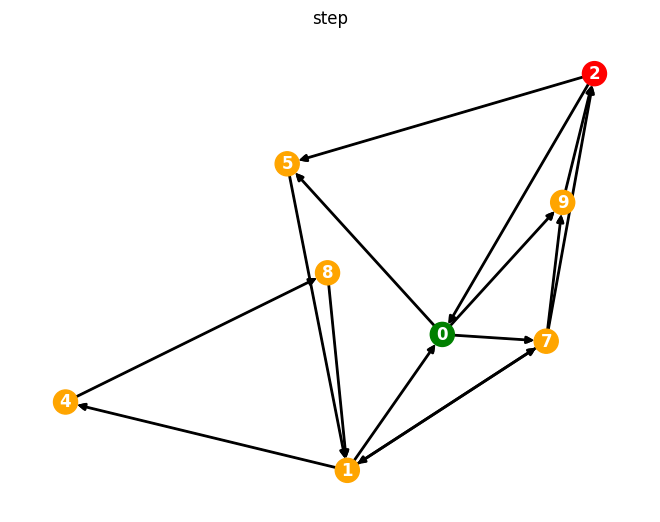

[8, 0, 9, 3, 6, 0, 5, 1, 0, 1, 0, 1, 4, 8, 3, 5, 1, 5, 1, 4]


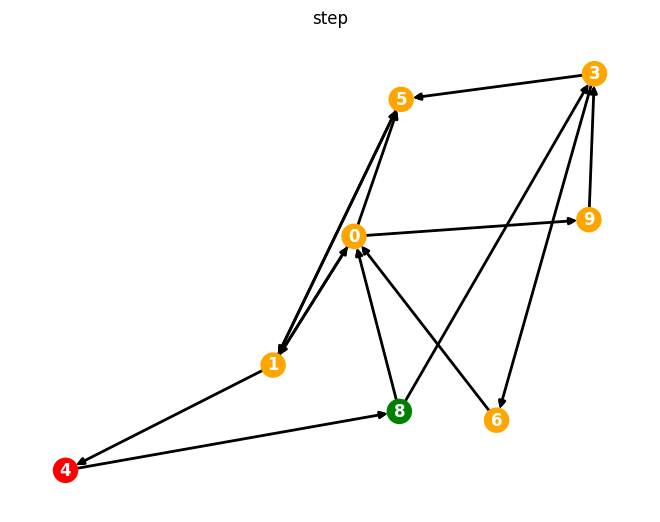

[4, 8, 0, 1, 4, 8, 4, 8, 3, 7, 0, 9, 1, 4, 8, 0, 4, 8, 0, 4]


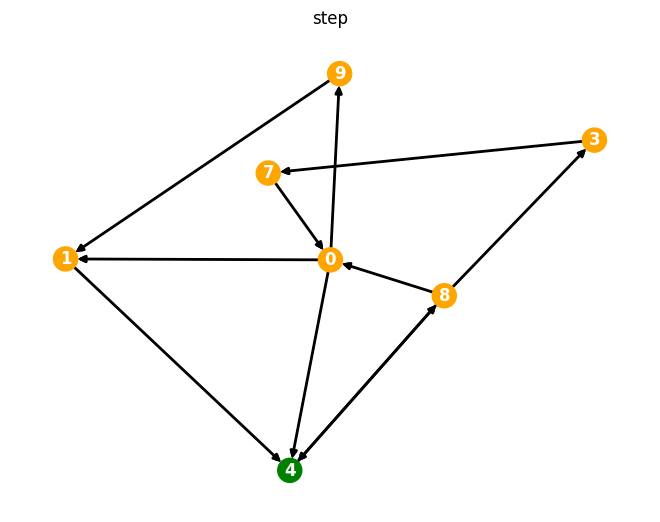

In [101]:
# must be at least the number of nodes in the graph
connectivity1, missing_nodes1 = is_connected(walk_graph, walks)
print("Initial check [" + "connected: "+ str(connectivity1) + ", missing nodes: " + str(missing_nodes1) +"]")

# to better ensure the random walks have checked for connectivity number of steps in the walk is 2x node count
walks2 = random_walk(walk_graph,(number_of_nodes*2),number_of_walks)
connectivity2, missing_nodes2 = is_connected(walk_graph, walks2)
print("Secondary check [" + "connected: "+ str(connectivity2) + ", missing nodes: " + str(missing_nodes2) +"]")
for walk in walks2:
    print(walk)

    #i found a stackoverflow article on how i can display each walk too
    draw_walk(walk_graph,walk)

# Testing Step count

In [102]:

def optimal_random_walk_test(Graph: nx.Graph,steps : int, randomStart : bool = False,start: int = None):
    # initalize new graph of path
    pathWalked = nx.Graph()

    # If randomStart is true, select a random start point
    if(randomStart):
        # Select random start node
        # print(G.number_of_nodes())
        position = random.randint(0,Graph.number_of_nodes()-1)
    # If not random start and no specified start, start at 0
    elif (start == None):
        position = 0

    # otherwise use specfied start
    else:
        position = start

    pathWalked.add_node(position)

 
    # for each step
    for step in range(steps):

        # get the neighboring nodes of the current node (accounts for directed and undirected graphs through .neighbours)
        neighbors = list(Graph.neighbors(position))
        
        if neighbors:
            destination = (random.choice(neighbors))
        else: #if node is a dead end, need to end the walk.  Any bidirectional walks would be listed if available
            break
            
            

        # add node to new graph
        pathWalked.add_node(destination)
        # Connect new node to previous position
        pathWalked.add_edge(position,destination)
        # print(position,destination)

        # update new current position
        position = destination


    return pathWalked


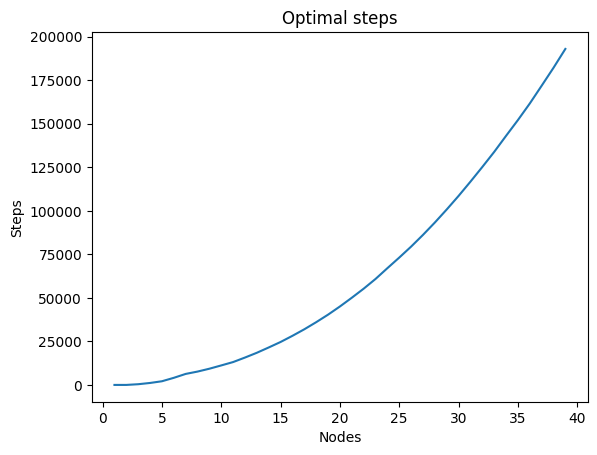

In [103]:
MAX_STEPS = 1000
MAX_TESTS = 100
MAX_NODES = 40
graph_is_directed =True

NumNodesList= list()
AvgBestStepsList= list()

# Track best walks
bestPath = None
largestConnectivity = 0
bestSteps = 0
averageBestSteps = 0
graphConnected = False

for numNodes in range(1,MAX_NODES):
    walk_graph = generate_graph(graph_is_directed, numNodes)
    # Repeat test to find average for that graph
    for walk in range(MAX_TESTS):
        # find the first step count that finds the full connectivity (or hits max steps)
        for steps in range(MAX_STEPS):
            # Create new graph of only path walked
            pathWalked = optimal_random_walk_test(Graph=walk_graph, steps=steps,randomStart=True)
            connectivity =  round((pathWalked.number_of_nodes()/walk_graph.number_of_nodes())*100,2)
            if connectivity > largestConnectivity:
                largestConnectivity = connectivity
                bestPath = pathWalked
                bestSteps = steps 
            if largestConnectivity == 100:
                graphConnected = True
                break
        averageBestSteps +=bestSteps
        largestConnectivity = 0
        bestSteps = 0 

    NumNodesList.append(numNodes)
    AvgBestStepsList.append(averageBestSteps)

# print("percent traversed:", round((bestPath.number_of_nodes()/ walk_graph.number_of_nodes())*100,2))
# if graphConnected:
#     print("average steps to prove full connectivity:" ,round(averageBestSteps/MAX_TESTS,2))
# else:
#     print("average steps to largest connectivity:" ,round(averageBestSteps/MAX_TESTS,2))


plt.plot(NumNodesList,AvgBestStepsList)
plt.xlabel("Nodes")
plt.ylabel("Steps")
plt.title("Optimal steps")
plt.show()

# Testing ST connected
Testing if two given nodes are connected

In [104]:
def isSTConnectedRandomWalk(Graph: nx.Graph,start,target,MAX_STEPS=None):
    if MAX_STEPS == None:
        MAX_STEPS = Graph.number_of_nodes()**4
    print("Max steps allowed: ",MAX_STEPS)
    # initalize new graph of path
    pathWalked = nx.Graph()

   
    position = start
    pathWalked.add_node(position)

 
    # for each step
    for step in range(MAX_STEPS):
        # print(position,target)
        if position == target:
            return pathWalked ,True

        # select edge to traverse 
        # edgeID = random.randint(0,len(Graph[position])-1)
        
        # get the neighboring nodes of the current node (accounts for directed and undirected graphs through .neighbours)
        neighbors = list(Graph.neighbors(position))
        
        if neighbors:
            destination = (random.choice(neighbors))
        else: #if node is a dead end, need to end the walk.  Any bidirectional walks would be listed if available
            break
            

        # add node to new graph
        pathWalked.add_node(destination)
        # Connect new node to previous position
        pathWalked.add_edge(position,destination)
        # print(position,destination)

        # update new current position
        position = destination


    return pathWalked,False